## Task 1

In [26]:
import numpy as np
import math 
import matplotlib.pyplot as plt


### Task 2e

De Casteljau's algorithm 

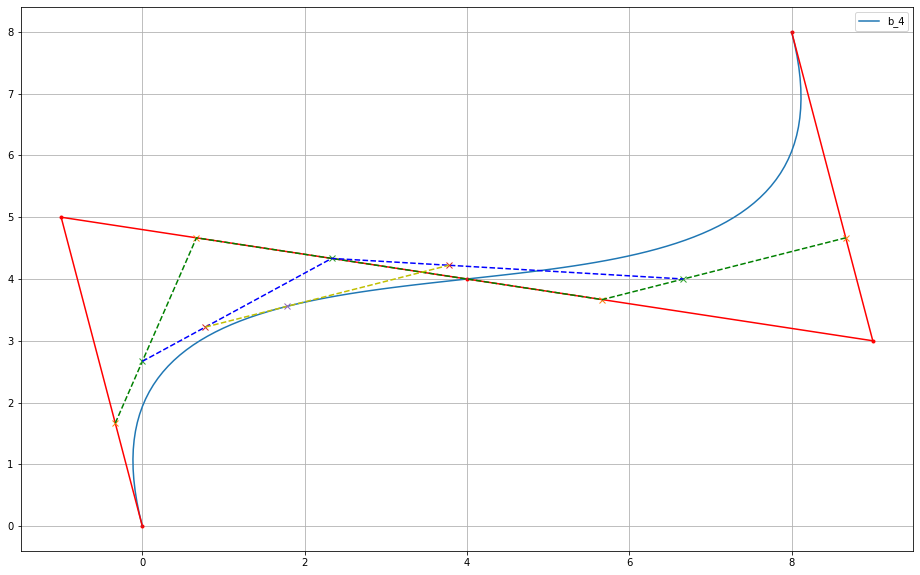

In [27]:
def de_Casteljau(P,t0):
    '''
    function that implements the de Casteljau algorithm

    input:
        P: vector of points we want to make a Bezier Curve for 
        t0: t-parameter 
    output:
        Pvecs[-1,0]: the point on the Bezier curve for t0 
        Pvecs[:,0]: vector of points for every "level" k considered 
    '''
    n,d = np.shape(P) #get dimentions of P 
    Pvecs = np.zeros((n, n, d)) #create matrix of points  
    Pvecs[0,:] = P #initialize the matrix 
    for k in range(1,n): #double for-loop to calculate the Bezier curve at t0 
        for i in range(0,n-k):
            Pvecs[k,i] = (1-t0) * Pvecs[k-1,i] + t0 * Pvecs[k-1, i+1] #de Casteljau's algorithm 
    return Pvecs[-1,0], Pvecs
    

p0 = [0,0]; p1 = [-1,5]; p2 = [4,4]; p3 = [9,3]; p4 = [8,8] #points that we want to make our Bezier curve for 
P = np.array([p0, p1, p2, p3, p4]) #make it into numpy array 


T = np.linspace(0,1, 100) #our time interval 

Pvecs = np.zeros((len(T),  2))#our bezier curve for different k-levels 
Pvecs2 = np.zeros((len(T), len(P),len(P), 2))
for t in range(len(T)): #for loop that uses de Casteljaus algrorithm 
    Pvecs[t] = de_Casteljau(P, T[t])[0]

plt.figure(figsize = (16,10))    
plt.plot(P[:,0], P[:,1], 'r.') #plot the points we want to make Bezier curve for 

plt.plot(Pvecs[:,0], Pvecs[:,1], label = f'b_4')

points2 = de_Casteljau(P, 1/3)[1]

plt.plot(points2[0,:,0], points2[0,:,1], 'r-')  
plt.plot(points2[1,:4,0], points2[1,:4,1], 'x')
plt.plot(points2[1,:4,0], points2[1,:4,1], 'g--')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'x')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'b--')
plt.plot(points2[3,:2,0], points2[3,:2,1], 'x')
plt.plot(points2[3,:2,0], points2[3,:2,1],'y--')   
plt.plot(points2[4,:1,0], points2[4,:1,1], 'x')
plt.grid(True)
plt.legend()

### Task 3 a

Composite Bezier curve 

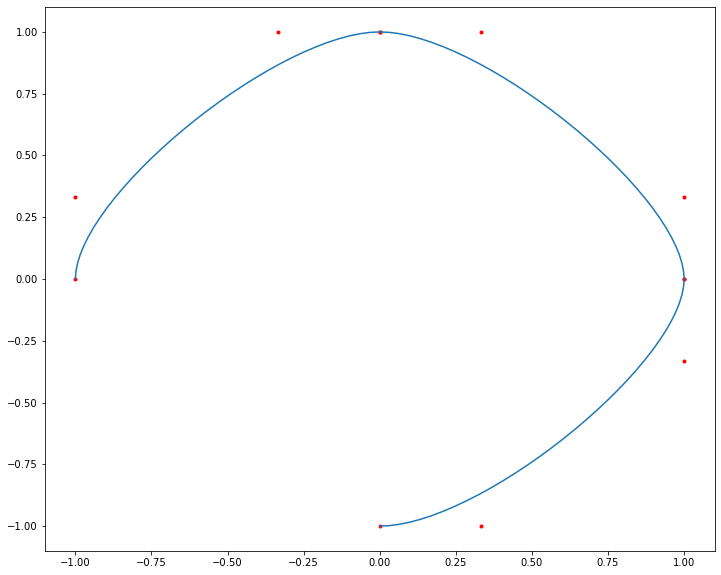

In [28]:
def composite_Bezier(P,t):
    '''
    Computes the composite Nezier curve for a set of points P on time interval t 
    input:
        P: points we want to compute the Bezier curve for
        t: time interval points 
    output:
        B: Bezier curve as a function of time, t
    '''
    B = np.zeros((len(t),2)) #array for our Bezier curve 
    i = 0 #indicator of the segment 
    for k in range(len(t)): 
        B[k] = de_Casteljau(P[:,i],t[k]-i)[0] #compute Bezier curve at a discrete point 
        if(int(np.floor(t[k])>i)): #if test that changes the segment 
            i+=1
    return B 
    
P = np.zeros((4, 3, 2)) #the points we want to make Bezier cruve for
P[0,0] = [-1,0];P[1,0] = [-1,1/3]; P[2,0] = [-1/3, 1]; P[3,0] = [0,1]
P[0,1] = [0,1];P[1,1] = [1/3,1]; P[2,1] = [1, 1/3]; P[3,1] = [1,0]
P[0,2] = [1,0];P[1,2] = [1,-1/3]; P[2,2] = [1/3, -1]; P[3,2] = [0,-1]

T = np.linspace(0,3,100) #time array 
B = composite_Bezier(P,T) #Bezier curve 
plt.figure(figsize = (12,10))
plt.plot(P[:,:,0], P[:,:,1], 'r.')
plt.plot(B[:,0], B[:,1])

### Task 3 b 

Construct algorithm for periodic composite cubic Bezier curve 

$$
\mathbf{B}(t) = \left\{ b_3(t - i +1; \mathbf{p}_{0,i}, \mathbf{p}_{1,i}, \mathbf{p}_{2,i}, \mathbf{p}_{3,i})  
\right. = \left\{ b_3(t - i +1; \mathbf{a}_{i}, \frac{\mathbf{v}_{i}}{3} + \mathbf{a}_{i}, \mathbf{a}_{i+1}-\frac{\mathbf{v}_{i+1}}{3} ,\mathbf{a}_{i+1} )  
\right.
$$

[[0.  1. ]
 [1.  1. ]
 [1.  0. ]
 [0.5 1. ]
 [0.  0. ]]


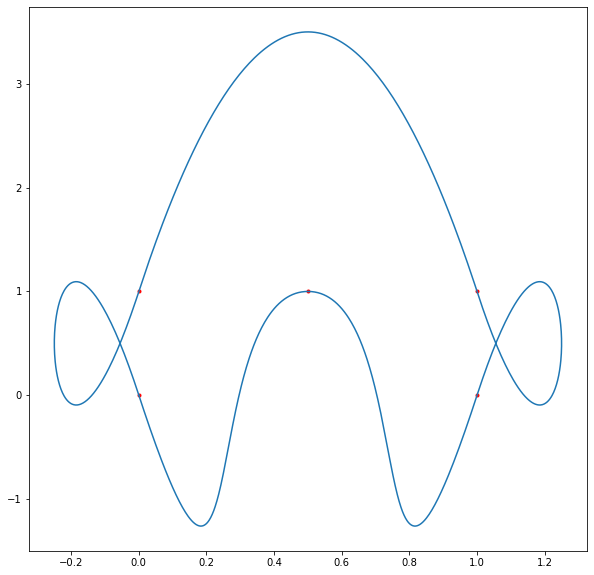

In [29]:
def interpolate_periodic(A,V):
    ''' 
    Function that uses the properties of Bezier curve to periodically interpolate points and its velocities 
    The functions returns control points for a Bezier curve 
    
    input: 
        A: datapoints we want to interpolate
        V: velocities at the datapoints
    output:
        P: control points for a Bezier curve 
    '''
    m,d = np.shape(A) #get shape of A 
    P = np.zeros((4,m,d)) #cinstruct array that contains our controlpoints
    for i in range(m-1):
        P[0,i] = A[i]
        P[1,i] = A[i] + V[i]/3
        P[2,i] = A[i+1] - V[i+1]/3
        P[3,i] = A[i+1]
    
    P[0,-1] = A[-1]
    P[1,-1] = A[-1] + V[-1]/3
    P[2,-1] = A[0] - V[0]/3
    P[3,-1] = A[0]
        
    return P

A = np.array([[0,0], [0,1], [1,1], [1,0], [0.5,1]])
m,d = np.shape(A)
V = np.array([[-1,10], [1,10], [1,-10], [-1,-10], [-1,0]])
P2 = interpolate_periodic(A,V)
T2 = np.linspace(0,m,1000)

curve = composite_Bezier(P2,T2)
plt.figure(figsize = (10,10))
plt.plot(P2[0,:,0], P2[0,:,1], 'r.')
plt.plot(curve[:,0], curve[:,1])
print(P2[-1])


### Task 3c 



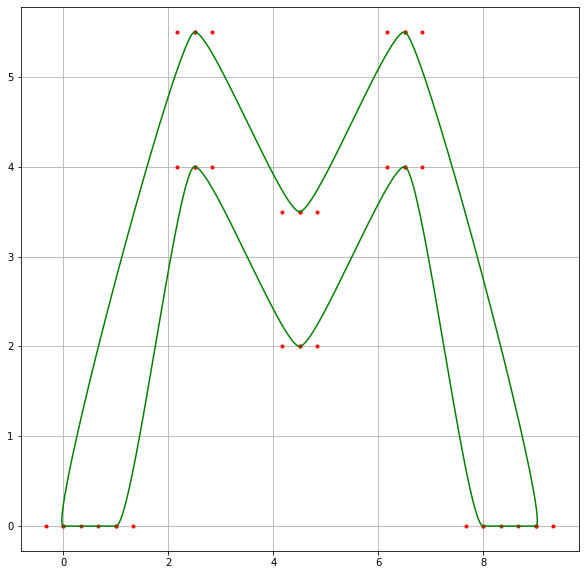

In [30]:
M = np.array([[0,0], [2.5, 5.5],  [4.5, 3.5], [6.5,5.5], [9,0], [8,0], [6.5,4], [4.5, 2], [2.5,4],[1,0]])
MV = np.array([[-1,0], [1, 0],  [1, 0], [1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0]])

m,d = np.shape(M)
T_M = np.linspace(0,m,1000)
P_M = interpolate_periodic(M,MV) 


curve_M = composite_Bezier(P_M,T_M)
plt.figure(figsize =(10,10))
plt.plot(P_M[:,:,0],P_M[:,:,1], 'r.')
plt.plot(curve_M[:,0], curve_M[:,1], 'g')
plt.grid()

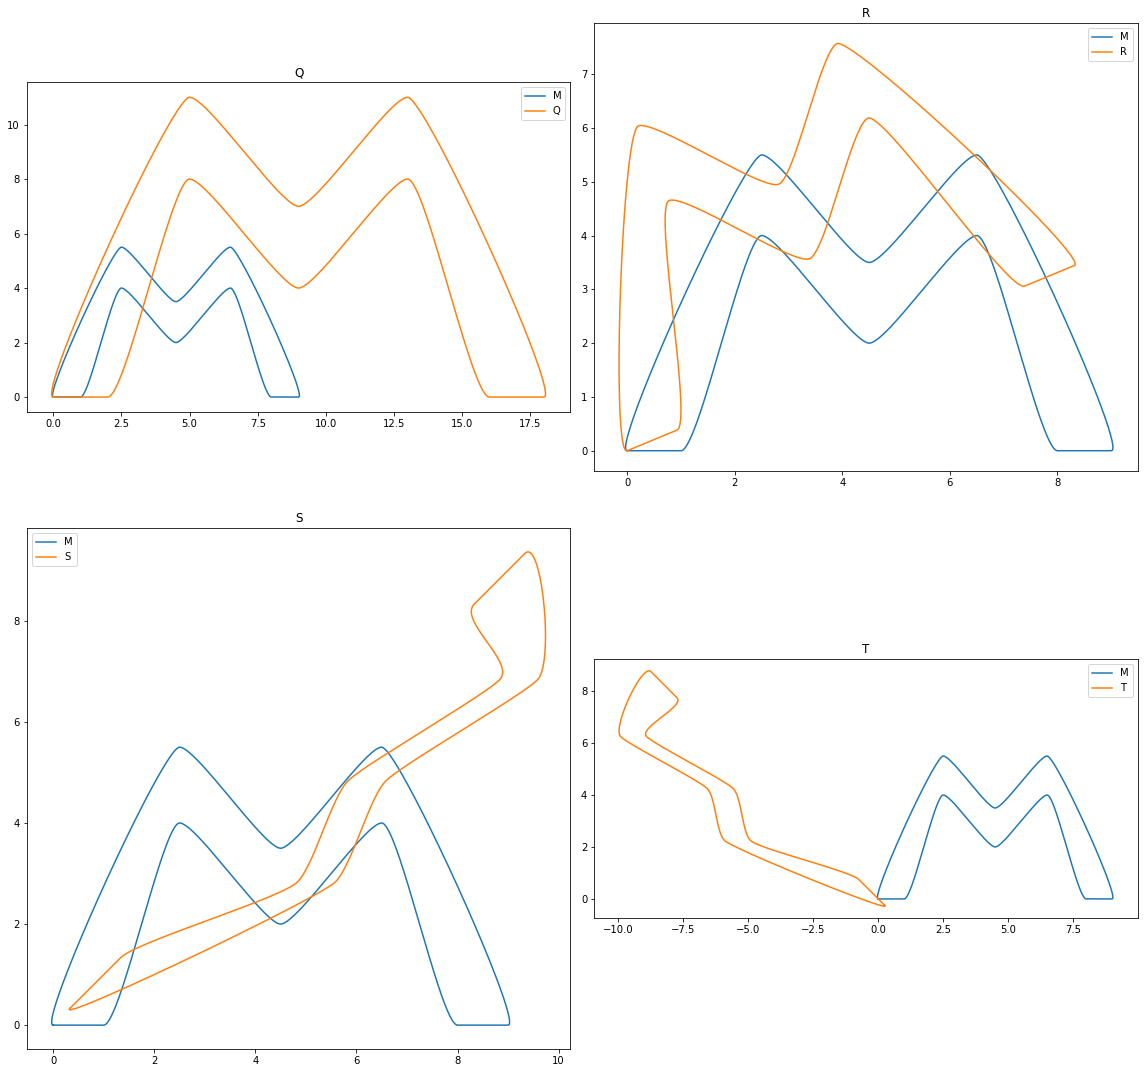

In [31]:
Q = np.zeros(np.shape(P_M)) #empty array for Q with same dimensions as P_M

theta = np.pi/8 #angle for rotation matrix
R_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) #R matrix 
R = np.zeros(np.shape(P_M)) #empty array for R with same dimensions as P_M

S_matrix = np.array([[1, 1/2], [1, 0]]) #S matrix 
cs = 1/3 * np.array([1,1]) #constant for S
S = np.zeros(np.shape(P_M)) #empty array for S with same dimensions as P_M

T_matrix = np.array([[-1, -2/3], [1, 0]])
T = np.zeros(np.shape(P_M)) #empty array for R with same dimensions as P_M
ct = 1/4 * np.array([1,-1]) #constant for T

#double for loop that generates Q, R, S and T 
for i in range(np.shape(P_M)[0]): 
    for j in range(np.shape(P_M)[1]):
        Q[i,j] = 2 * P_M[i,j] 
        R[i,j] = R_matrix @ P_M[i,j] 
        S[i,j] = S_matrix @ P_M[i,j] + cs 
        T[i,j] = T_matrix @ P_M[i,j] + ct

#Bezier curves for the transformations 
curve_Q = composite_Bezier(Q, T_M)        
curve_R = composite_Bezier(R, T_M)
curve_S = composite_Bezier(S, T_M)
curve_T = composite_Bezier(T, T_M)

#Plots of the transformations Q, R, S and T compared to M 
fig, axes = plt.subplots(2,2, figsize = (16,16))

axes[0,0].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[0,0].plot(curve_Q[:,0], curve_Q[:,1], label = f'Q')
axes[0,0].set_aspect('equal')
axes[0,0].set_title(f'Q')
axes[0,0].legend()


axes[0,1].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[0,1].plot(curve_R[:,0], curve_R[:,1], label = f'R')
axes[0,1].set_aspect('equal')
axes[0,1].set_title(f'R')
axes[0,1].legend()

axes[1,0].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[1,0].plot(curve_S[:,0], curve_S[:,1], label = f'S')
axes[1,0].set_aspect('equal')
axes[1,0].set_title(f'S')
axes[1,0].legend()

axes[1,1].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[1,1].plot(curve_T[:,0], curve_T[:,1], label = f'T')
axes[1,1].set_aspect('equal')
axes[1,1].set_title(f'T')
axes[1,1].legend()

plt.tight_layout()


For each of the mappings $\mathbf{Q}$, $\mathbf{R}$, $\mathbf{S}$ and $\mathbf{T}$ we get shear mappings. A shear mapping is mapping that displaces a image along fixed direction, rotates and/or streches the iamge. 

For $\mathbf{Q}$ we get a scaled version of $\mathbf{M}$. Each point $\mathbf{p}_{i,j}$ is displaced a factor of $2$ in ${x}$ and ${y}$ direction

For $\mathbf{R}$ we recoginize $\begin{pmatrix} \cos(\frac{\pi}{8}) & - \sin(\frac{\pi}{8}) \\ \sin(\frac{\pi}{8}) & \cos(\frac{\pi}{8})\end{pmatrix}$ as the rotation matrix with an angle $\frac{\pi}{8}$. After applying the rotation matrix on all the points in $\mathbf{M}$ we get a rotated version of $\mathbf{M}$

For $\mathbf{S}$  we get the displacement of every point such that $\mathbf{s}_{i,j} =  \begin{pmatrix} 1 & \frac{1}{2} \\ 1 & 0 \end{pmatrix} \mathbf{p}_{i,j} + \frac{1}{3}\begin{pmatrix} 1 \\ 1\end{pmatrix}= \begin{pmatrix} x_{i,j} + \frac{1}{2} y_{i,j} + \frac{1}{3}\\ x_{i,j} + \frac{1}{3}\end{pmatrix}$. We see that all y-values get replaced by the original x-values $-\frac{1}{4}$. The x-values is displaced på the original y-values + $\frac{1}{4}$. The new curve is a M flipped upside down, strechted, displaced $\frac{1}{4}$ in x-direction and displaced $-\frac{1}{4}$ in y-direction

In [49]:
def gradient_F_tilde(Q): 
    '''
    function that calculates the gradient of F_tilde 
    input:
        Q: A 4x2 array with control points in the segment we want to compute the gradient for 
    output:
        Gradient of F_tilde 
    '''
    return 12*np.array([2*P[0] - 3*P[1] + P[2], -3*P[0]  +6*P[1] - 6*P[2] + 3*P[3], P[0] - 6*P[1] +14*P[2] -9*P[3], 3*P[1] - 9*P[2] + 6*P[3]])    



In [55]:
def gradient_G(P,D,l):
    '''
    function that calculates the gradient of G_lambda
    input:
        P: Array with only two points per segment we want to compute the gradient for 
        D: Data points
        l: lambda 
    output:
        grad_G: Gradient of G_lambda 
    '''
    grad_G = np.zeros_like(P) #array for gradient with same dimentions as P 
    it = 0 #iterator for datapoints 
    Q = [] #list that contains points we compute gradient for 
    for i in range(0, len(P)-2,2): #for loop that computes the gradient of G_lambda 
        #extract controlpoints 
        Q.append(P[i]) 
        Q.append(P[i+1])
        Q.append(P[i+2]) 
        Q.append(P[i+3])
        #Q.append(2*P[i+2]- P[i+3])
        #Q.append(P[i+2])

        grad_F_tilde = gradient_F_tilde(Q) #compute gradient in each segment 
        grad_G[i] += grad_F_tilde[0] + l*(P[i]-D[it])  #add weight of datapoints 
        grad_G[i+1] += grad_F_tilde[1] 
        grad_G[i+2] += grad_F_tilde[2] 
        grad_G[i+3] += grad_F_tilde[3] 
        Q = []
        it += 1 

    #do the same as in the for-loop but with the last two points and the first two controll points so we have periodcity 
    Q.append(P[-2]) 
    Q.append(P[-1])
    Q.append(P[0]) 
    Q.append(P[1])
    #Q.append(2*P[0] - P[1])
    #Q.append(P[0])
    grad_F_tilde = gradient_F_tilde(Q)
    grad_G[-2] += grad_F_tilde[0] + l*(P[-2]-D[-1])  
    grad_G[-1] += grad_F_tilde[1]
    grad_G[0] += grad_F_tilde[2] 
    grad_G[1] += grad_F_tilde[3] 
    return grad_G #return gradient of G_lambda 

In [56]:
def compress_P(P): 
    '''
    function that compresses a matrix of control points to a list of points 
    that has only two control points in each segment
    We do not take out four controll points in the last segment since we want
    to have a periodic list 
    input: 
        P: matrix with controll points we want to compress 
    output:
        Q: array with only two controll points for each segment  
    '''
    n,m,d = np.shape(P) #get shape of matrix 
    Q = [] #empty list we want to store our compressed control points 
    for j in range(m): #for loop rows
        for i in range(2): #for loop columns 
            Q.append(P[i,j]) #extract controll points 
    Q = np.array(Q)
    return Q

def extend_P(P):
    '''
    function that extends a compressed array of control points 
    so that we have four control points for each segment.
    It also makes the array periodic

    input:
        P: compressed array with only two controll points per segment in a bezier curve 
    output:
        Q: a complete array of controll points that maintains periodicty 
        
    '''
    Q = [] #empty list 
    for i in range(0,len(P)-2, 2): #for loop that extract four points and calculates the missing control points 
        Q.append(P[i]) 
        Q.append(P[i+1])
        Q.append(2*P[i+2]- P[i+3])
        Q.append(P[i+2])
    Q.append(P[-2])
    Q.append(P[-1])
    Q.append(2*P[0] - P[1])
    Q.append(P[0])
    Q = np.array(Q)
    return Q

def make_grid(P):
    '''
    function that rearranges a list of control points in to a matrix so that we can use
    composite_Bezier function on it. There are no changes made to the points

    input:
        P: list with control points we want to rearrange
    output: 
        Q: matrix with control points 
    '''
    m = int(len(P)/4)
    l = 0
    Q = np.zeros((4, m, 2))
    for i in range(m):
        for j in range(4):
            Q[j,i] = P[l]
            l +=1 
    return Q

In [57]:
def gradient_Descent(P, D, l, tol = 1e-10, maxiter = 10000):
    '''
    gradient descent algorithm for G_lambda 
    input:
        P: matrix of control points 
        D: datapoints 
        l: lambda 
        tol: stopping criteria for gradient
        maxiter: maximum number of iterations 
    output: 
        P: optimized matrix of control 
        i: number of iteations
    '''
    P = compress_P(P)
    i=0
    d = 1
    while(np.linalg.norm(d) > tol  and i < maxiter):
        d = gradient_G(P, D, l)
        P-= 0.0001*d    
        i +=1
    P = make_grid(extend_P(P))
    return P, i, np.linalg.norm(d) 

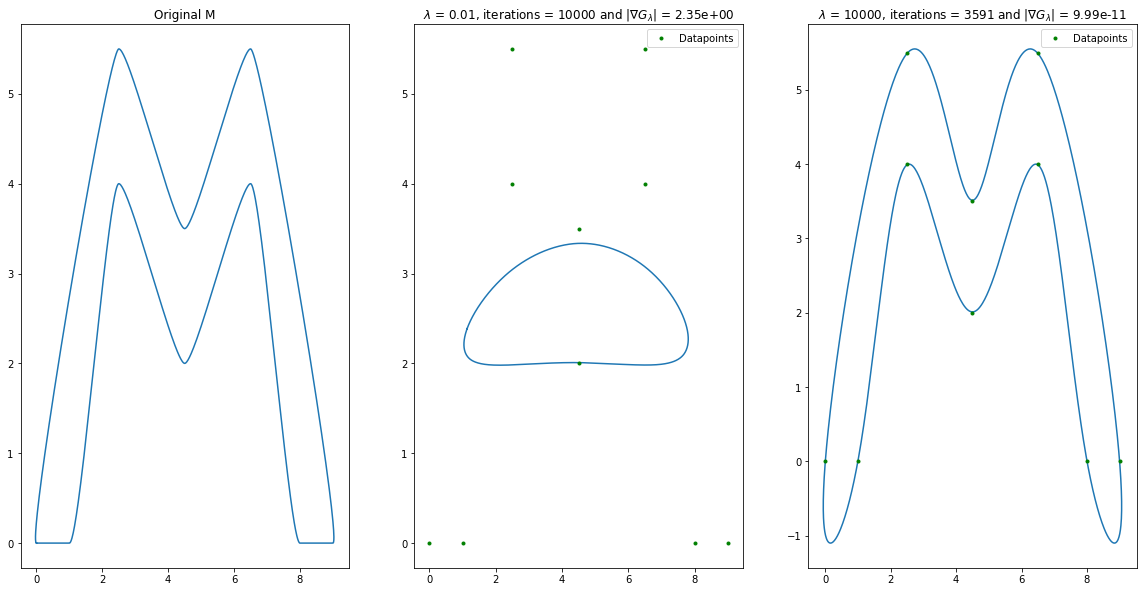

In [53]:
lambda1 = 0.01
lambda2 = 10000
Q_M1, iterations1, error1 = gradient_Descent(P_M, M, lambda1)
Q_M2, iterations2, error2 = gradient_Descent(P_M, M, lambda2)

curve_P_M = composite_Bezier(P_M, T_M)
curve_Q_M1 = composite_Bezier(Q_M1, T_M)
curve_Q_M2 = composite_Bezier(Q_M2, T_M)

fig, axes = plt.subplots(1,3, figsize = (20,10))

axes[0].plot(curve_P_M[:,0], curve_P_M[:,1])
axes[0].set_title(f'Original M')

axes[1].plot(curve_Q_M1[:,0], curve_Q_M1[:,1])
axes[1].set_title(r'$\lambda$' +  f' = {lambda1}, iterations = {iterations1} and ' + r'|$\nabla G_{\lambda}$|' + f' = {error1:.2e}')
axes[1].plot(M[:,0], M[:,1], 'g.', label = f'Datapoints')
axes[1].legend()

axes[2].plot(curve_Q_M2[:,0], curve_Q_M2[:,1])
axes[2].set_title(r'$\lambda$' +  f' = {lambda2}, iterations = {iterations2} and ' + r'$|\nabla G_{\lambda}$|' + f' = {error2:.2e}')
axes[2].plot(M[:,0], M[:,1], 'g.', label =  f'Datapoints')
axes[2].legend()


When lambda is small we see that the gradient descent algorithm gives a curve that does not resemble the original letter at all. Which makes since we do not weight the data points highly, but want a curve with as low acceleration as possible. Our algorithm does not meet our tolerance requirement, this might be because $\nabla F$ does not have a unique solution. 

When lambda is big we can easily recognise the original letter. It interpolates all data points. The letter is  smoother than the original, specialy around the bottom of the letter where we go from straight lines to more smooth curves. Another nice property is that $\nabla G_{\lambda}$ is below our tolerance level which means that we have found a minimizer of G